In [1]:
# Creating a model

import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)
tf.config.list_physical_devices(device_type=None)


from keras.models import Sequential
from keras.layers import Dense

# Custom activation function
from keras.layers import Activation
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects

import numpy as np
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np
from keras import layers

from sklearn.metrics import confusion_matrix
import seaborn as sns


import numpy as np
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np
from keras import layers




In [2]:
def custom_activation(x):
    return tf.where(x<0, tf.multiply(x,0), tf.where(x<2.4, tf.multiply(0.6,x),tf.where(x<6.9,tf.add(tf.multiply(0.21,x),0.95),tf.add(tf.multiply(0.5,x),-1.05))))

get_custom_objects().update({'custom_activation': Activation(custom_activation)})

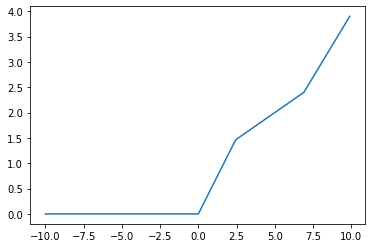

In [3]:
list1=[]
for i in np.arange(-10,10,0.1):
    a=tf.constant([i])
    b=custom_activation(a)
    list1.append(b)
    
plt.plot(np.arange(-10,10,0.1),list1)

In [9]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
train_data = np.expand_dims(x_train, -1)
test_data = np.expand_dims(x_test, -1)


# convert class vectors to binary class matrices
train_label = to_categorical(y_train, num_classes)
test_label = to_categorical(y_test, num_classes)

In [7]:
epoch_fix=30

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 400)               314000    
_________________________________________________________________
dense_4 (Dense)              (None, 200)               80200     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2010      
Total params: 396,210
Trainable params: 396,210
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

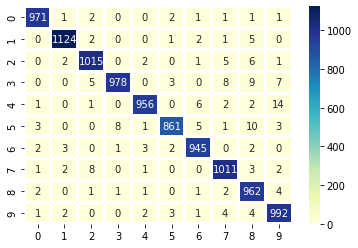

In [11]:
#MNIST relu

input_shape=(28,28,1)
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Flatten(),
        layers.Dense(400,activation='relu'),
        layers.Dense(200,activation='relu'),

        layers.Dense(10,activation='softmax'),
    ]
)

model.summary()

batch_size = 128
epochs = epoch_fix
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history_MNIST_Relu=model.fit(train_data, train_label, batch_size=batch_size, epochs=epochs, validation_data=(test_data, test_label),verbose=0)



test_predictions = model.predict(test_data)
cm = confusion_matrix(y_true = np.argmax(test_label,axis=1), y_pred = np.argmax(test_predictions,axis=1))
sns.heatmap(cm,annot=True,fmt='d',linewidths=2,cmap="YlGnBu")

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 400)               314000    
_________________________________________________________________
dense_7 (Dense)              (None, 200)               80200     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                2010      
Total params: 396,210
Trainable params: 396,210
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

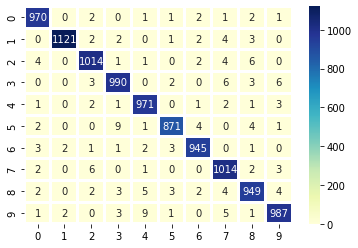

In [12]:
#MNIST Sigmoid

input_shape=(28,28,1)
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Flatten(),
        layers.Dense(400,activation='sigmoid'),
        layers.Dense(200,activation='sigmoid'),

        layers.Dense(10,activation='softmax'),
    ]
)

model.summary()

batch_size = 128
epochs = epoch_fix
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history_MNIST_Sigmoid=model.fit(train_data, train_label, batch_size=batch_size, epochs=epochs, validation_data=(test_data, test_label),verbose=0)



test_predictions = model.predict(test_data)
cm = confusion_matrix(y_true = np.argmax(test_label,axis=1), y_pred = np.argmax(test_predictions,axis=1))
sns.heatmap(cm,annot=True,fmt='d',linewidths=2,cmap="YlGnBu")

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 400)               314000    
_________________________________________________________________
dense_10 (Dense)             (None, 200)               80200     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                2010      
Total params: 396,210
Trainable params: 396,210
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

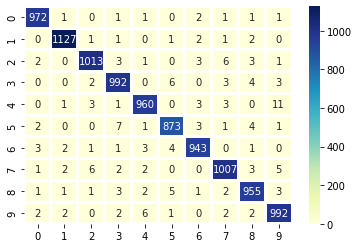

In [13]:
#MNIST Bistable
input_shape=(28,28,1)
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Flatten(),
        #layers.Dense(200,activation=tf.keras.activations.sigmoid),
        
        layers.Dense(400,activation=custom_activation),
        layers.Dense(200,activation=custom_activation),
        layers.Dense(10,activation='softmax'),
    ]
)

model.summary()

batch_size = 128
epochs = epoch_fix
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history_MNIST_Bistable=model.fit(train_data, train_label, batch_size=batch_size, epochs=epochs, validation_data=(test_data, test_label),verbose=0)


test_predictions = model.predict(test_data)
cm = confusion_matrix(y_true = np.argmax(test_label,axis=1), y_pred = np.argmax(test_predictions,axis=1))
sns.heatmap(cm,annot=True,fmt='d',linewidths=2,cmap="YlGnBu")

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 400)               314000    
_________________________________________________________________
dense_13 (Dense)             (None, 200)               80200     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                2010      
Total params: 396,210
Trainable params: 396,210
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

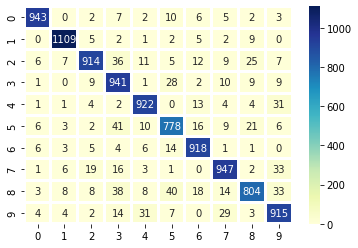

In [14]:
#MNIST no activation
input_shape=(28,28,1)
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Flatten(),
        #layers.Dense(200,activation=tf.keras.activations.sigmoid),
        layers.Dense(400),
        layers.Dense(200),
        layers.Dense(10,activation='softmax'),
    ]
)

model.summary()

batch_size = 128
epochs = epoch_fix
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history_MNIST_No=model.fit(train_data, train_label, batch_size=batch_size, epochs=epochs, validation_data=(test_data, test_label),verbose=0)

test_predictions = model.predict(test_data)
cm = confusion_matrix(y_true = np.argmax(test_label,axis=1), y_pred = np.argmax(test_predictions,axis=1))
sns.heatmap(cm,annot=True,fmt='d',linewidths=2,cmap="YlGnBu")

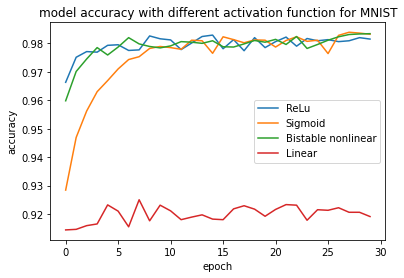

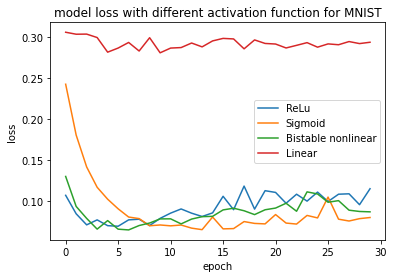

0.9815000295639038 0.11504480242729187
0.9832000136375427 0.07993238419294357
0.9833999872207642 0.0868607610464096
0.9190999865531921 0.2936951518058777


In [43]:
#Plot accuracy vs epochs 
plt.plot(history_MNIST_Relu.history['val_accuracy'])
plt.plot(history_MNIST_Sigmoid.history['val_accuracy'])
plt.plot(history_MNIST_Bistable.history['val_accuracy'])
plt.plot(history_MNIST_No.history['val_accuracy'])
plt.title('model accuracy with different activation function for MNIST')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['ReLu', 'Sigmoid','Bistable nonlinear','Linear'], loc='center right')
plt.show()


plt.plot(history_MNIST_Relu.history['val_loss'])
plt.plot(history_MNIST_Sigmoid.history['val_loss'])
plt.plot(history_MNIST_Bistable.history['val_loss'])
plt.plot(history_MNIST_No.history['val_loss'])
plt.title('model loss with different activation function for MNIST')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['ReLu', 'Sigmoid','Bistable nonlinear','Linear'], loc='center right')
plt.show()

print(history_MNIST_Relu.history['val_accuracy'][29],history_MNIST_Relu.history['val_loss'][29])
print(history_MNIST_Sigmoid.history['val_accuracy'][29],history_MNIST_Sigmoid.history['val_loss'][29])
print(history_MNIST_Bistable.history['val_accuracy'][29],history_MNIST_Bistable.history['val_loss'][29])
print(history_MNIST_No.history['val_accuracy'][29],history_MNIST_No.history['val_loss'][29])

In [16]:
#Load FashionMNIST

(train_data, train_label), (test_data, test_label) = tf.keras.datasets.fashion_mnist.load_data()

train_label=to_categorical(train_label)
test_label=to_categorical(test_label)

label=["T-Shirt","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle Boot"]
train_data=train_data/255
test_data=test_data/255

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 400)               314000    
_________________________________________________________________
dense_16 (Dense)             (None, 200)               80200     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                2010      
Total params: 396,210
Trainable params: 396,210
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

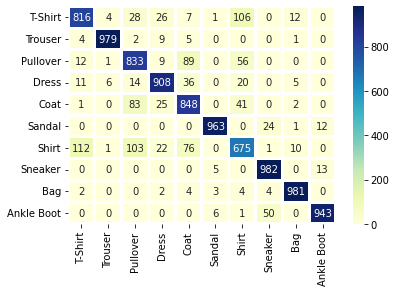

In [17]:
#Fashion MNIST relu
input_shape=(28,28,1)
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Flatten(),
        layers.Dense(400,activation='relu'),
        layers.Dense(200,activation='relu'),

        layers.Dense(10,activation='softmax'),
    ]
)

model.summary()

batch_size = 128
epochs = epoch_fix
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history_FasionMNIST_Relu=model.fit(train_data, train_label, batch_size=batch_size, epochs=epochs, validation_data=(test_data, test_label),verbose=0)

test_predictions = model.predict(test_data)
cm = confusion_matrix(y_true = np.argmax(test_label,axis=1), y_pred = np.argmax(test_predictions,axis=1))
sns.heatmap(cm,annot=True,fmt='d',linewidths=2,cmap="YlGnBu",xticklabels=label,yticklabels=label)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 400)               314000    
_________________________________________________________________
dense_19 (Dense)             (None, 200)               80200     
_________________________________________________________________
dense_20 (Dense)             (None, 10)                2010      
Total params: 396,210
Trainable params: 396,210
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

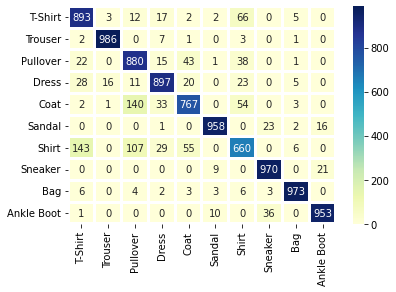

In [18]:
#Fashion MNIST Sigmoid
input_shape=(28,28,1)
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Flatten(),
        layers.Dense(400,activation='sigmoid'),
        layers.Dense(200,activation='sigmoid'),

        layers.Dense(10,activation='softmax'),
    ]
)

model.summary()

batch_size = 128
epochs = epoch_fix
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history_FasionMNIST_Sigmoid=model.fit(train_data, train_label, batch_size=batch_size, epochs=epochs, validation_data=(test_data, test_label),verbose=0)

test_predictions = model.predict(test_data)
cm = confusion_matrix(y_true = np.argmax(test_label,axis=1), y_pred = np.argmax(test_predictions,axis=1))
sns.heatmap(cm,annot=True,fmt='d',linewidths=2,cmap="YlGnBu",xticklabels=label,yticklabels=label)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 400)               314000    
_________________________________________________________________
dense_22 (Dense)             (None, 200)               80200     
_________________________________________________________________
dense_23 (Dense)             (None, 10)                2010      
Total params: 396,210
Trainable params: 396,210
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

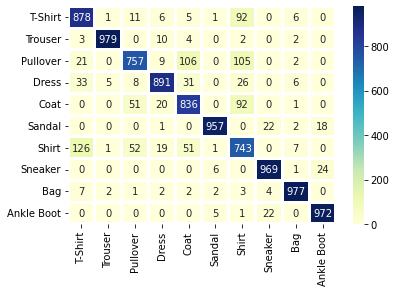

In [19]:
#Fashion MNIST Bistable

input_shape=(28,28,1)
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Flatten(),
        #layers.Dense(200,activation=tf.keras.activations.sigmoid),
        layers.Dense(400,activation=Activation(custom_activation, name='SpecialActivation')),
        layers.Dense(200,activation=Activation(custom_activation, name='SpecialActivation')),
        layers.Dense(10,activation='softmax'),
    ]
)

model.summary()

batch_size = 128
epochs = epoch_fix
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history_FashionMNIST_Bistable=model.fit(train_data, train_label, batch_size=batch_size, epochs=epochs, validation_data=(test_data, test_label),verbose=0)


test_predictions = model.predict(test_data)
cm = confusion_matrix(y_true = np.argmax(test_label,axis=1), y_pred = np.argmax(test_predictions,axis=1))
sns.heatmap(cm,annot=True,fmt='d',linewidths=2,cmap="YlGnBu",xticklabels=label,yticklabels=label)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 400)               314000    
_________________________________________________________________
dense_25 (Dense)             (None, 200)               80200     
_________________________________________________________________
dense_26 (Dense)             (None, 10)                2010      
Total params: 396,210
Trainable params: 396,210
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

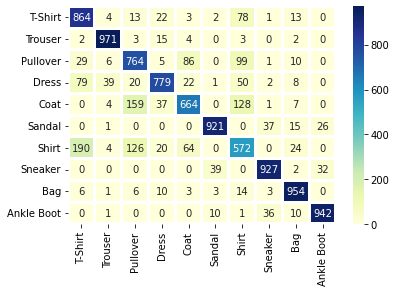

In [20]:
#Fashion MNIST no activation
input_shape=(28,28,1)
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Flatten(),
        #layers.Dense(200,activation=tf.keras.activations.sigmoid),
        layers.Dense(400),
        layers.Dense(200),
        layers.Dense(10,activation='softmax'),
    ]
)

model.summary()

batch_size = 128
epochs = epoch_fix
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history_FashionMNIST_No=model.fit(train_data, train_label, batch_size=batch_size, epochs=epochs, validation_data=(test_data, test_label),verbose=0)


test_predictions = model.predict(test_data)
cm = confusion_matrix(y_true = np.argmax(test_label,axis=1), y_pred = np.argmax(test_predictions,axis=1))
sns.heatmap(cm,annot=True,fmt='d',linewidths=2,cmap="YlGnBu",xticklabels=label,yticklabels=label)

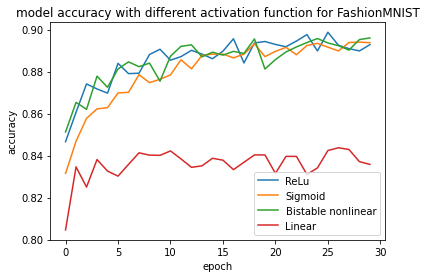

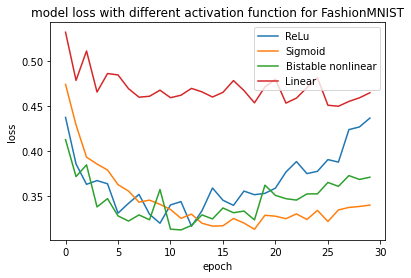

0.892799973487854 0.43672657012939453
0.8937000036239624 0.3398098051548004
0.8960000276565552 0.37086203694343567
0.8357999920845032 0.4649190902709961


In [47]:
#Plot accuracy vs epochs 
plt.plot(history_FasionMNIST_Relu.history['val_accuracy'])
plt.plot(history_FasionMNIST_Sigmoid.history['val_accuracy'])
plt.plot(history_FashionMNIST_Bistable.history['val_accuracy'])
plt.plot(history_FashionMNIST_No.history['val_accuracy'])
plt.title('model accuracy with different activation function for FashionMNIST')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['ReLu', 'Sigmoid','Bistable nonlinear','Linear'], loc='lower right')
plt.show()


plt.plot(history_FasionMNIST_Relu.history['val_loss'])
plt.plot(history_FasionMNIST_Sigmoid.history['val_loss'])
plt.plot(history_FashionMNIST_Bistable.history['val_loss'])
plt.plot(history_FashionMNIST_No.history['val_loss'])
plt.title('model loss with different activation function for FashionMNIST')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['ReLu', 'Sigmoid','Bistable nonlinear','Linear'], loc='upper right')
plt.show()


print(history_FasionMNIST_Relu.history['val_accuracy'][29],history_FasionMNIST_Relu.history['val_loss'][29])
print(history_FasionMNIST_Sigmoid.history['val_accuracy'][29],history_FasionMNIST_Sigmoid.history['val_loss'][29])
print(history_FashionMNIST_Bistable.history['val_accuracy'][29],history_FashionMNIST_Bistable.history['val_loss'][29])
print(history_FashionMNIST_No.history['val_accuracy'][29],history_FashionMNIST_No.history['val_loss'][29])

In [4]:
from keras.datasets import cifar10
# load dataset
(train_data, train_label), (test_data, test_label) = cifar10.load_data()
# one hot encode target values
train_label = to_categorical(train_label)
test_label = to_categorical(test_label)
train_data=train_data/255
test_data=test_data/255

In [10]:
label=["airplanes","automobiles","birds","cats","deers","dogs","frogs","horses","ships","trucks"]

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 400)               1229200   
_________________________________________________________________
dense_10 (Dense)             (None, 200)               80200     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                2010      
Total params: 1,311,410
Trainable params: 1,311,410
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

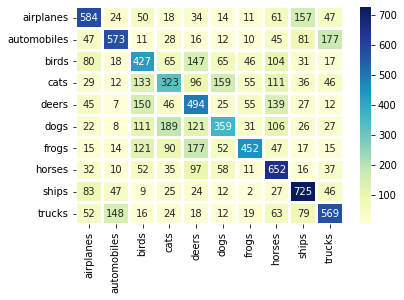

In [11]:
#CIFAR-10 relu
input_shape=(32,32,3)
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        
        layers.Flatten(),
        layers.Dense(400,activation='relu'),
        layers.Dense(200,activation='relu'),
        layers.Dense(10,activation='softmax'),
    ]
)

model.summary()

batch_size = 128
epochs = epoch_fix
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history_CIFAR_Relu=model.fit(train_data, train_label, batch_size=batch_size, epochs=epochs, validation_data=(test_data, test_label),verbose=0)
test_predictions = model.predict(test_data)
cm = confusion_matrix(y_true = np.argmax(test_label,axis=1), y_pred = np.argmax(test_predictions,axis=1))
sns.heatmap(cm,annot=True,fmt='d',linewidths=2,cmap="YlGnBu",xticklabels=label,yticklabels=label)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 400)               1229200   
_________________________________________________________________
dense_13 (Dense)             (None, 200)               80200     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                2010      
Total params: 1,311,410
Trainable params: 1,311,410
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

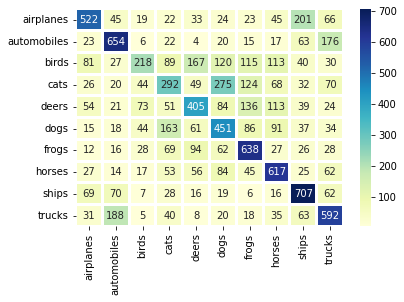

In [12]:
#CIFAR-10 Sigmoid
input_shape=(32,32,3)
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        
        layers.Flatten(),
        layers.Dense(400,activation='sigmoid'),
        layers.Dense(200,activation='sigmoid'),
        layers.Dense(10,activation='softmax'),
    ]
)

model.summary()

batch_size = 128
epochs = epoch_fix
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history_CIFAR_Sigmoid=model.fit(train_data, train_label, batch_size=batch_size, epochs=epochs, validation_data=(test_data, test_label),verbose=0)
test_predictions = model.predict(test_data)
cm = confusion_matrix(y_true = np.argmax(test_label,axis=1), y_pred = np.argmax(test_predictions,axis=1))
sns.heatmap(cm,annot=True,fmt='d',linewidths=2,cmap="YlGnBu",xticklabels=label,yticklabels=label)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 400)               1229200   
_________________________________________________________________
dense_4 (Dense)              (None, 200)               80200     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2010      
Total params: 1,311,410
Trainable params: 1,311,410
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

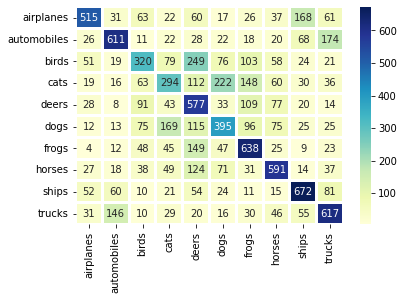

In [8]:
#CIFAR-10 Bistable
input_shape=(32,32,3)
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        
        layers.Flatten(),
        layers.Dense(400,activation=custom_activation),
        layers.Dense(200,activation=custom_activation),
        layers.Dense(10,activation='softmax'),
    ]
)

model.summary()

batch_size = 64
epochs = epoch_fix
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history_CIFAR_Bistable=model.fit(train_data, train_label, batch_size=batch_size, epochs=epochs, validation_data=(test_data, test_label),verbose=0)
test_predictions = model.predict(test_data)
cm = confusion_matrix(y_true = np.argmax(test_label,axis=1), y_pred = np.argmax(test_predictions,axis=1))
sns.heatmap(cm,annot=True,fmt='d',linewidths=2,cmap="YlGnBu",xticklabels=label,yticklabels=label)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 400)               1229200   
_________________________________________________________________
dense_7 (Dense)              (None, 200)               80200     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                2010      
Total params: 1,311,410
Trainable params: 1,311,410
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

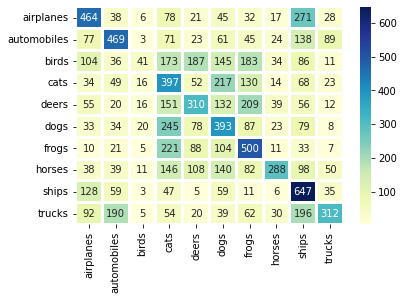

In [9]:
#CIFAR-10 no activation
input_shape=(32,32,3)
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        
        layers.Flatten(),
        layers.Dense(400),
        layers.Dense(200),
        layers.Dense(10,activation='softmax'),
    ]
)

model.summary()

batch_size = 128
epochs = epoch_fix
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history_CIFAR_No=model.fit(train_data, train_label, batch_size=batch_size, epochs=epochs, validation_data=(test_data, test_label),verbose=0)
test_predictions = model.predict(test_data)
cm = confusion_matrix(y_true = np.argmax(test_label,axis=1), y_pred = np.argmax(test_predictions,axis=1))
sns.heatmap(cm,annot=True,fmt='d',linewidths=2,cmap="YlGnBu",xticklabels=label,yticklabels=label)

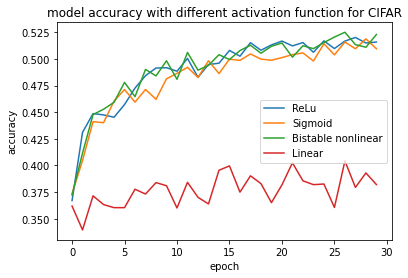

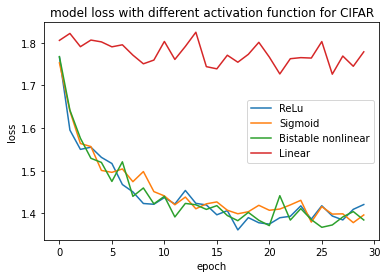

In [15]:
#Plot accuracy vs epochs 
plt.plot(history_CIFAR_Relu.history['val_accuracy'])
plt.plot(history_CIFAR_Sigmoid.history['val_accuracy'])
plt.plot(history_CIFAR_Bistable.history['val_accuracy'])
plt.plot(history_CIFAR_No.history['val_accuracy'])
plt.title('model accuracy with different activation function for CIFAR')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['ReLu', 'Sigmoid','Bistable nonlinear','Linear'], loc='center right')
plt.show()


plt.plot(history_CIFAR_Relu.history['val_loss'])
plt.plot(history_CIFAR_Sigmoid.history['val_loss'])
plt.plot(history_CIFAR_Bistable.history['val_loss'])
plt.plot(history_CIFAR_No.history['val_loss'])
plt.title('model loss with different activation function for CIFAR')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['ReLu', 'Sigmoid','Bistable nonlinear','Linear'], loc='center right')
plt.show()

In [14]:
print(history_CIFAR_Relu.history['val_accuracy'][29],history_CIFAR_Relu.history['val_loss'][29])
print(history_CIFAR_Sigmoid.history['val_accuracy'][29],history_CIFAR_Sigmoid.history['val_loss'][29])
print(history_CIFAR_Bistable.history['val_accuracy'][29],history_CIFAR_Bistable.history['val_loss'][29])
print(history_CIFAR_No.history['val_accuracy'][29],history_CIFAR_No.history['val_loss'][29])

0.5159000158309937 1.4207768440246582
0.5095999836921692 1.3963508605957031
0.5230000019073486 1.3845237493515015
0.382099986076355 1.778710961341858
